<a href="https://colab.research.google.com/github/alirezafarhadi01/Computational_Data_Mining/blob/main/Project_5/DataMining_Project_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Section 1

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# load SECOM data (space-separated, no header)
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom.data"
print(f"Loading dataset")
raw_df = pd.read_csv(data_url, sep=r"\s+", header=None)

print(f"Original shape: {raw_df.shape}")

# fill missing values with median (simple + robust)
print("Imputing missing values with median...")
clean_df = raw_df.fillna(raw_df.median())

# drop constant columns (std = 0)
print("Removing constant columns...")
col_std = clean_df.std()
keep_cols = col_std.ne(0)              # True for non-constant columns
clean_df = clean_df.loc[:, keep_cols]

print(f"Shape after cleaning: {clean_df.shape}")
print(f"Dropped {raw_df.shape[1] - clean_df.shape[1]} constant columns.")

# standardize features (mean=0, std=1)
print("Normalizing data...")
scaler = StandardScaler()
norm_arr = scaler.fit_transform(clean_df)
norm_df = pd.DataFrame(norm_arr, columns=clean_df.columns)

# quick check
print("\nFirst 5 rows of normalized data:")
print(norm_df.iloc[:5, :5])
print(f"\nMean of first feature: {norm_df.iloc[:, 0].mean():.2f}")
print(f"Std of first feature: {norm_df.iloc[:, 0].std():.2f}")


Loading dataset
Original shape: (1567, 590)
Imputing missing values with median...
Removing constant columns...
Shape after cleaning: (1567, 474)
Dropped 116 constant columns.
Normalizing data...

First 5 rows of normalized data:
          0         1         2         3         4
0  0.224463  0.849523 -0.436430  0.035804 -0.050121
1  1.107287 -0.383106  1.016977  0.155282 -0.059585
2 -1.114000  0.798901 -0.481447  0.688278 -0.047447
3 -0.350156 -0.199072 -0.051705 -1.104376 -0.050831
4  0.242296  0.087328  1.117227 -0.156616 -0.047033

Mean of first feature: 0.00
Std of first feature: 1.00


In [16]:
# Section 2

import pandas as pd
import time
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier

# load SECOM labels
label_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/secom/secom_labels.data"
print("Loading labels...")
lab_df = pd.read_csv(label_url, sep=r"\s+", header=None)

# target labels
y = lab_df.iloc[:, 0]

# normalized features from Section 1
X = df_norm.copy()

print(f"Features shape: {X.shape} | Labels shape: {y.shape}")

# ---- Filter: Mutual Information ----
print("\nRunning Mutual Information feature selection...")

mi_sel = SelectKBest(mutual_info_classif, k=20)
mi_sel.fit(X, y)

mi_idx = mi_sel.get_support(indices=True)
mi_cols = X.columns[mi_idx]

# nicer text output
mi_df = pd.DataFrame({
    "Rank": range(1, len(mi_cols) + 1),
    "Feature": mi_cols
})

print("\nTop 20 Features (Mutual Info):")
print(mi_df.to_string(index=False))

# ---- Wrapper: RFE + RandomForest ----
print("\nRunning RFE with Random Forest...")

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rfe_sel = RFE(
    estimator=rf,
    n_features_to_select=20,
    step=10
)

t_start = time.time()
rfe_sel.fit(X, y)
t_end = time.time()

rfe_cols = X.columns[rfe_sel.support_]

rfe_df = pd.DataFrame({
    "Rank": range(1, len(rfe_cols) + 1),
    "Feature": rfe_cols
})

print("\nTop 20 Features (RFE):")
print(rfe_df.to_string(index=False))

print(f"\nRFE Execution Time: {(t_end - t_start):.4f} seconds")


Loading labels...
Features shape: (1567, 474) | Labels shape: (1567,)

Running Mutual Information feature selection...

Top 20 Features (Mutual Info):
 Rank  Feature
    1       19
    2       33
    3       40
    4       41
    5       65
    6      122
    7      130
    8      273
    9      277
   10      405
   11      416
   12      447
   13      477
   14      541
   15      570
   16      571
   17      573
   18      575
   19      577
   20      589

Running RFE with Random Forest...

Top 20 Features (RFE):
 Rank  Feature
    1       16
    2       40
    3       59
    4       64
    5       65
    6       71
    7       77
    8      103
    9      132
   10      152
   11      153
   12      205
   13      301
   14      333
   15      341
   16      348
   17      426
   18      441
   19      539
   20      562

RFE Execution Time: 154.2493 seconds


Computing SVD (this may take a moment)...
SVD Shapes -> U: (1567, 474), s: (474,), Vt: (474, 474)
Selected k = 170 components (95% variance).

Top 20 Features (Algebraic SVD Method):
    Feature       Score
0       441  27107.5966
1       170  26969.3143
2       305  26438.8640
3        72  25945.5683
4       452  25917.4468
5       213  25857.2007
6       473  25849.9143
7       351  25831.9096
8       440  25816.9189
9        65  25770.0211
10       73  25754.9242
11      169  25723.9900
12      175  25713.1165
13      180  25697.4304
14      304  25689.6220
15      446  25683.7811
16      310  25647.5694
17      168  25628.2561
18      121  25624.4869
19      303  25609.3209


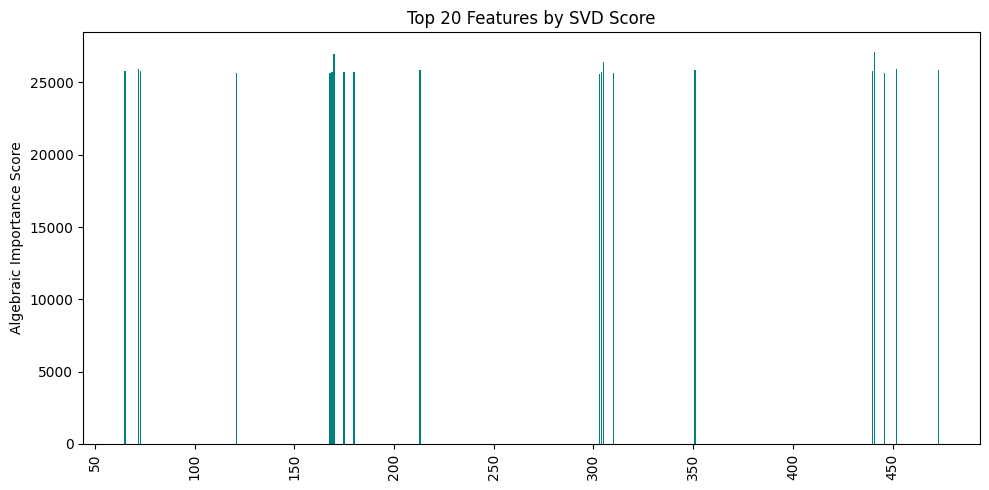

In [15]:
# Section 3

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# use normalized data from Section 1
X = df_norm.values
feat_names = df_norm.columns

print("Computing SVD (this may take a moment)...")

# economy SVD
U, s, Vt = np.linalg.svd(X, full_matrices=False)

print(f"SVD Shapes -> U: {U.shape}, s: {s.shape}, Vt: {Vt.shape}")

# cumulative explained variance
var_ratio = np.cumsum(s**2) / np.sum(s**2)

# choose k for 95% variance
k = np.argmax(var_ratio >= 0.95) + 1
print(f"Selected k = {k} components (95% variance).")

# feature scoring
s2 = s[:k] ** 2
V_abs = np.abs(Vt[:k, :])
scores = s2 @ V_abs

# results table
score_df = pd.DataFrame({
    "Feature": feat_names,
    "Score": scores
})

top20 = score_df.sort_values("Score", ascending=False).head(20)

print("\nTop 20 Features (Algebraic SVD Method):")
print(
    top20
    .reset_index(drop=True)
    .round(4)
    .to_string(index=True)
)

# ---- plot (unchanged) ----
plt.figure(figsize=(10, 5))
plt.bar(top20["Feature"], top20["Score"], color="teal")
plt.xticks(rotation=90)
plt.title("Top 20 Features by SVD Score")
plt.ylabel("Algebraic Importance Score")
plt.tight_layout()
plt.show()



Comparison results:
              Method Accuracy F1-Score Selection Time
Mutual Info (Filter)   0.5669   0.6659           < 1s
       RFE (Wrapper)   0.7261   0.7874        153.51s
     SVD (Algebraic)   0.6146   0.7045           ~ 1s


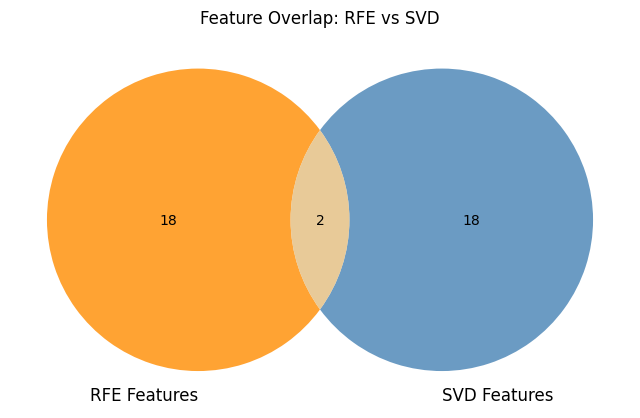


Overlap summary:
- RFE count: 20
- SVD count: 20
- Common: 2 features
- Common %: 10.0%


In [19]:
# Section 4

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

def eval_feat_set(X, y, feats, name, t_str):
    # train LR on chosen features
    X_sub = X[feats]

    # split train/test
    X_tr, X_te, y_tr, y_te = train_test_split(
        X_sub, y, test_size=0.2, random_state=42
    )

    # logistic regression (balanced classes)
    clf = LogisticRegression(max_iter=1000, solver="lbfgs", class_weight="balanced")
    clf.fit(X_tr, y_tr)

    # predict + metrics
    y_hat = clf.predict(X_te)
    acc = accuracy_score(y_te, y_hat)
    f1w = f1_score(y_te, y_hat, average="weighted")

    return {
        "Method": name,
        "Selection Time": t_str,
        "Accuracy": acc,
        "F1-Score": f1w
    }

# data + feature lists from previous sections
X = df_norm
feat_mi = mi_cols.tolist()
feat_rfe = rfe_cols.tolist()
feat_svd = top20["Feature"].tolist()

# run evaluations
rows = [
    eval_feat_set(X, y, feat_mi, "Mutual Info (Filter)", "< 1s"),
    eval_feat_set(X, y, feat_rfe, "RFE (Wrapper)", f"{(t1 - t0):.2f}s"),
    eval_feat_set(X, y, feat_svd, "SVD (Algebraic)", "~ 1s")
]

res_df = pd.DataFrame(rows)

# nicer output (same info, different display)
res_df["Accuracy"] = res_df["Accuracy"].map(lambda v: f"{v:.4f}")
res_df["F1-Score"] = res_df["F1-Score"].map(lambda v: f"{v:.4f}")
res_df = res_df[["Method", "Accuracy", "F1-Score", "Selection Time"]]

print("\nComparison results:")
print(res_df.to_string(index=False))

# ---- venn diagram (UNCHANGED) ----
plt.figure(figsize=(8, 6))

set_rfe = set(feat_rfe)
set_svd = set(feat_svd)

try:
    venn2(
        [set_rfe, set_svd],
        set_labels=("RFE Features", "SVD Features"),
        set_colors=("darkorange", "steelblue"),
        alpha=0.8
    )
    plt.title("Feature Overlap: RFE vs SVD")
    plt.show()
except ImportError:
    print("\n(matplotlib-venn not installed, skipping diagram)")

# overlap stats (same values, different print)
ov = len(set_rfe & set_svd)
pct = (ov / 20) * 100

print("\nOverlap summary:")
print(f"- RFE count: {len(set_rfe)}")
print(f"- SVD count: {len(set_svd)}")
print(f"- Common: {ov} features")
print(f"- Common %: {pct:.1f}%")
